# Importing Libraries and Datasets

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Load Data
data = pd.read_excel('/kaggle/input/urdu-twitter-reviews/Proposed Dataset.xlsx')
data.dropna(inplace=True)

In [4]:
data.head()

,sentence,target,sents
0,اس کا تھمب نیل ویگن پورن جیسا لگتا ہے۔,0,اس کا تھمب نیل ویگن پورن جیسا لگتا
1,اس کے بال بہت اچھے ہیں اوہ ما خدا مجھے اس پر و...,0,اس بال بہت اوہ ما خدا مجھے اس واقعی فخر کاش می...
2,یہ ویڈیو کتنی پرانی ہے کیونکہ میں جانتا ہوں کہ...,0,ویڈیو کتنی پرانی کیونکہ میں جانتا آپ کسی بیکن ...
3,اگر وہ مکمل ویگن ہو رہی ہے تو وہ جانتی ہے کہ و...,0,اگر وہ مکمل ویگن وہ جانتی وہ ایسی مصنوعات استع...
4,میرے پسندیدہ سبزی خور کھانے میں سے کچھ سوادج پ...,0,میرے پسندیدہ سبزی خور کھانے میں سے کچھ سوادج پ...


In [5]:
# Load Data
data1 = pd.read_csv('/kaggle/input/urdu-twitter-reviews/train.csv')
data1.dropna(inplace=True)

In [6]:
data1.head()

,id,tweet,target
0,1024,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1
1,1919,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0
2,102,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0
3,679,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0
4,2093,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0


In [7]:
print("Number of samples in 'data':", data.shape[0])
print("Number of samples in 'data1':", data1.shape[0])

Number of samples in 'data': 96974
Number of samples in 'data1': 2400


# Model for Uni and Bi Gram TF IDF

In [10]:
# Define N-gram ranges to test
ngram_configs = {
    'Unigram': (1, 1),
    'Bigram': (2, 2)
}

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=100000),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),  # Reduce number of trees
    'SVM': SVC(),
    'Gaussian Naive Bayes': GaussianNB()
}

In [11]:
# Evaluate for each n-gram range
for ngram_name, ngram_range in ngram_configs.items():
    print(f'--- Results for {ngram_name} ---')
    print('-' * 50)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=20000)  # Limit features
    X = vectorizer.fit_transform(data['sents'])
    y = data['target']
    Xx = vectorizer.transform(data1['tweet'])  # Transform test data using the same vectorizer
    Yy = data1['target']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        if model_name == 'Gaussian Naive Bayes':
            # Gaussian Naive Bayes requires dense matrix
            model.fit(X_train.toarray(), y_train)
            y_pred = model.predict(X_test.toarray())
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f'{model_name} Performance:')
        print(f'  Accuracy : {accuracy:.4f}')
        print(f'  Precision: {precision:.4f}')
        print(f'  Recall   : {recall:.4f}')
        print(f'  F1-Score : {f1:.4f}')
        print()

        if model_name == 'Gaussian Naive Bayes':
            y_pred = model.predict(Xx.toarray())
        else:
            y_pred = model.predict(Xx)

        # Evaluate metrics
        accuracy = accuracy_score(Yy, y_pred)
        precision = precision_score(Yy, y_pred, average='weighted')
        recall = recall_score(Yy, y_pred, average='weighted')
        f1 = f1_score(Yy, y_pred, average='weighted')

        print(f'{model_name} Performance on DUAL Dataset:')
        print(f'  Accuracy : {accuracy:.4f}')
        print(f'  Precision: {precision:.4f}')
        print(f'  Recall   : {recall:.4f}')
        print(f'  F1-Score : {f1:.4f}')
        print()

--- Results for Unigram ---
--------------------------------------------------
Logistic Regression Performance:
  Accuracy : 0.7952
  Precision: 0.7973
  Recall   : 0.7952
  F1-Score : 0.7955

Logistic Regression Performance on DUAL Dataset:
  Accuracy : 0.8504
  Precision: 0.8518
  Recall   : 0.8504
  F1-Score : 0.8503

Random Forest Performance:
  Accuracy : 0.7527
  Precision: 0.7535
  Recall   : 0.7527
  F1-Score : 0.7529

Random Forest Performance on DUAL Dataset:
  Accuracy : 0.8796
  Precision: 0.8823
  Recall   : 0.8796
  F1-Score : 0.8794

SVM Performance:
  Accuracy : 0.7817
  Precision: 0.7852
  Recall   : 0.7817
  F1-Score : 0.7822

SVM Performance on DUAL Dataset:
  Accuracy : 0.8938
  Precision: 0.8942
  Recall   : 0.8938
  F1-Score : 0.8937

Gaussian Naive Bayes Performance:
  Accuracy : 0.6346
  Precision: 0.6768
  Recall   : 0.6346
  F1-Score : 0.6253

Gaussian Naive Bayes Performance on DUAL Dataset:
  Accuracy : 0.6746
  Precision: 0.6748
  Recall   : 0.6746
  F1-Sco

# Model for Uni and Bi Gram TF IDF

In [20]:
# Define N-gram ranges to test
ngram_configs = {
    'Trigram': (3, 3),
    'Unigram + Bigram + Trigram': (1, 3)
}

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=100000),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),  # Reduce number of trees and parallelize
    'SVM': SVC(),
    'Gaussian Naive Bayes': GaussianNB()
}

In [21]:
# DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [22]:
# Evaluate for each n-gram range
for ngram_name, ngram_range in ngram_configs.items():
    print(f'--- Results for {ngram_name} ---')
    print('-' * 50)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=20000)
    X = vectorizer.fit_transform(data['sents'])
    y = data['target']
    Xx = vectorizer.transform(data1['tweet'])  # Transform test data using the same vectorizer
    Yy = data1['target']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        if model_name == 'Gaussian Naive Bayes':
            # Gaussian Naive Bayes requires dense matrix
            model.fit(X_train.toarray(), y_train)
            y_pred = model.predict(X_test.toarray())
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        # Save results in the DataFrame using pd.concat
        result = pd.DataFrame([{
            'Model': model_name,
            'Dataset': 'Train-Test',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }])

        results_df = pd.concat([results_df, result], ignore_index=True)

        print(f'{model_name} Performance:')
        print(f'  Accuracy : {accuracy:.4f}')
        print(f'  Precision: {precision:.4f}')
        print(f'  Recall   : {recall:.4f}')
        print(f'  F1-Score : {f1:.4f}')
        print()

        if model_name == 'Gaussian Naive Bayes':
            y_pred = model.predict(Xx.toarray())
        else:
            y_pred = model.predict(Xx)

        # Evaluate metrics
        accuracy = accuracy_score(Yy, y_pred)
        precision = precision_score(Yy, y_pred, average='weighted')
        recall = recall_score(Yy, y_pred, average='weighted')
        f1 = f1_score(Yy, y_pred, average='weighted')
         # Save results in the DataFrame using pd.concat
        result = pd.DataFrame([{
            'Model': model_name,
            'Dataset': 'DUAL',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }])

        results_df = pd.concat([results_df, result], ignore_index=True)

        print(f'{model_name} Performance on DUAL Dataset:')
        print(f'  Accuracy : {accuracy:.4f}')
        print(f'  Precision: {precision:.4f}')
        print(f'  Recall   : {recall:.4f}')
        print(f'  F1-Score : {f1:.4f}')
        print()

--- Results for Trigram ---
--------------------------------------------------


<ipython-input-22-6d4a7978678b>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result], ignore_index=True)


Logistic Regression Performance:
  Accuracy : 0.6329
  Precision: 0.6463
  Recall   : 0.6329
  F1-Score : 0.6070

Logistic Regression Performance on DUAL Dataset:
  Accuracy : 0.6017
  Precision: 0.7150
  Recall   : 0.6017
  F1-Score : 0.5443

Random Forest Performance:
  Accuracy : 0.6147
  Precision: 0.6208
  Recall   : 0.6147
  F1-Score : 0.5898

Random Forest Performance on DUAL Dataset:
  Accuracy : 0.6262
  Precision: 0.7317
  Recall   : 0.6262
  F1-Score : 0.5808

SVM Performance:
  Accuracy : 0.6237
  Precision: 0.6351
  Recall   : 0.6237
  F1-Score : 0.5964

SVM Performance on DUAL Dataset:
  Accuracy : 0.6221
  Precision: 0.7357
  Recall   : 0.6221
  F1-Score : 0.5729

Gaussian Naive Bayes Performance:
  Accuracy : 0.6214
  Precision: 0.6397
  Recall   : 0.6214
  F1-Score : 0.5868

Gaussian Naive Bayes Performance on DUAL Dataset:
  Accuracy : 0.5846
  Precision: 0.7473
  Recall   : 0.5846
  F1-Score : 0.5063

--- Results for Unigram + Bigram + Trigram ---
-------------------

In [24]:
# Display results
print("Results DataFrame:")
results_df

Results DataFrame:


,Model,Dataset,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Train-Test,0.632895,0.646255,0.632895,0.606990
1,Logistic Regression,DUAL,0.601667,0.714989,0.601667,0.544338
2,Random Forest,Train-Test,0.614695,0.620842,0.614695,0.589820
3,Random Forest,DUAL,0.626250,0.731726,0.626250,0.580768
4,SVM,Train-Test,0.623717,0.635129,0.623717,0.596373
5,SVM,DUAL,0.622083,0.735723,0.622083,0.572902
6,Gaussian Naive Bayes,Train-Test,0.621449,0.639651,0.621449,0.586821
7,Gaussian Naive Bayes,DUAL,0.584583,0.747331,0.584583,0.506263
8,Logistic Regression,Train-Test,0.796906,0.798986,0.796906,0.797270
9,Logistic Regression,DUAL,0.840417,0.843401,0.840417,0.840166


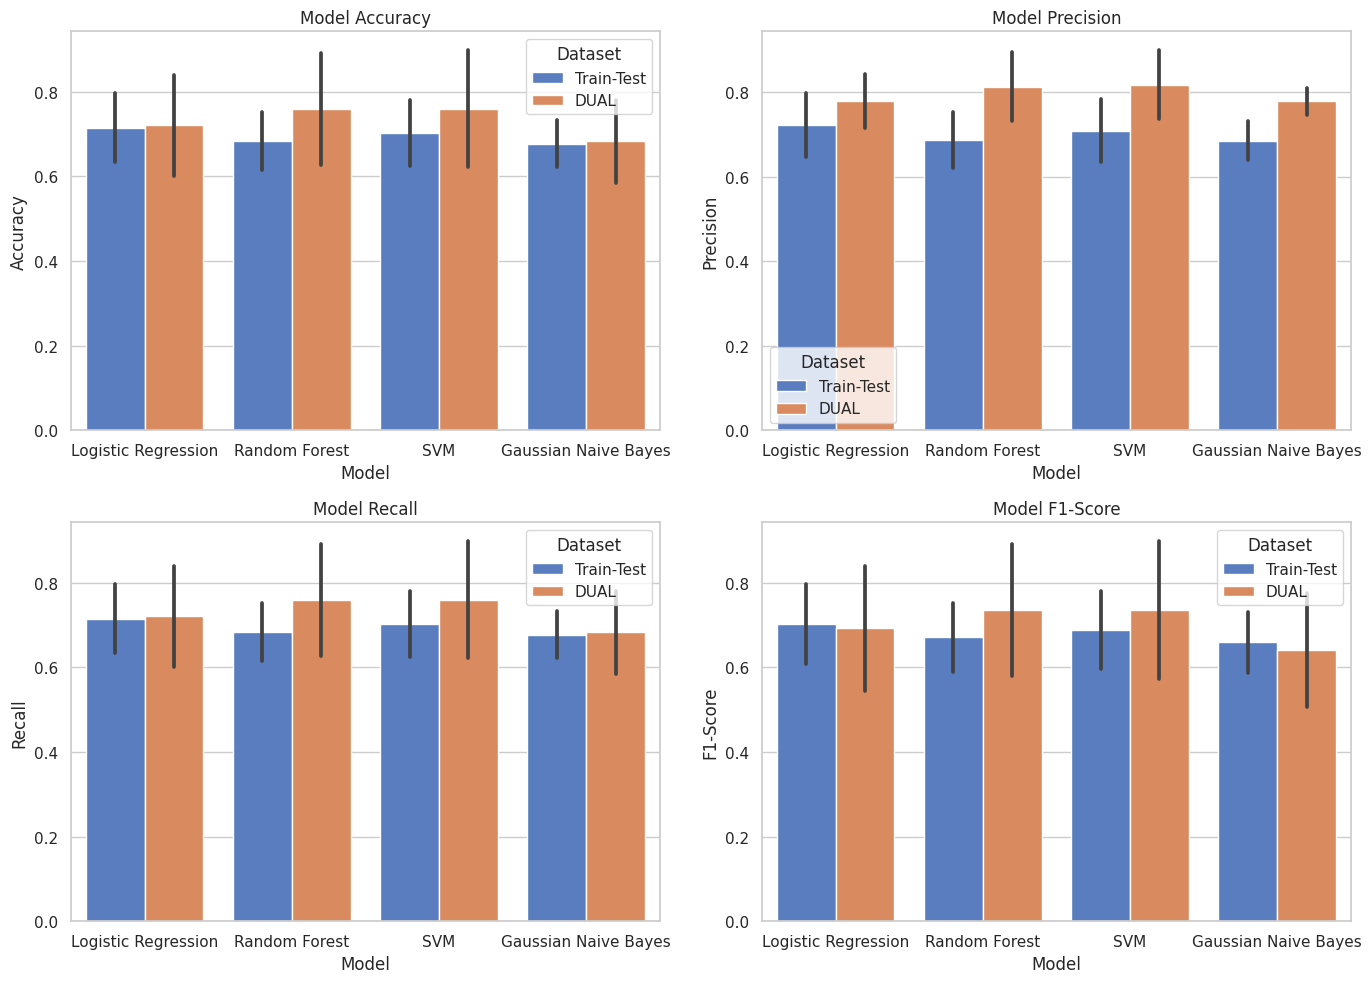

In [29]:
# Plotting results
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Accuracy chart
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=results_df, palette="muted")
plt.title('Model Accuracy')

# Precision chart
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Precision", hue="Dataset", data=results_df, palette="muted")
plt.title('Model Precision')

# Recall chart
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Recall", hue="Dataset", data=results_df, palette="muted")
plt.title('Model Recall')

# F1-Score chart
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="F1-Score", hue="Dataset", data=results_df, palette="muted")
plt.title('Model F1-Score')

plt.tight_layout()
plt.show()